## 04_DataPreprocessing.ipynb

### 🎯 Objective
Prepare the cleaned dataset for machine learning by:
- Augmenting images
- Splitting into train, validation, and test folders

### 🔧 Steps
- Organize dataset into 3 subsets
- Maintain label directories
- Save structured data into an output folder


#### ℹ️ Note:
A 70-20-10 split was chosen to ensure that the model has sufficient data to learn from (70%), while also providing enough examples to validate its performance during training (20%) and evaluate its generalization on unseen data (10%).


### Image Augmentation and Generator Setup

To improve the robustness of our model and reduce overfitting, we apply data augmentation to the training dataset using the `ImageDataGenerator` class from TensorFlow.

The following augmentations are applied:
- **Rotation**: Random rotations up to ±20 degrees
- **Shift**: Horizontal and vertical shifts by 10% of the image dimensions
- **Shearing**: Image distortion by shear transformations
- **Zoom**: Random zoom in/out up to 10%
- **Flipping**:
  - Horizontal (left-right)
  - Vertical (top-down)
- **Fill Mode**: When transformations leave empty space (like rotation), pixels are filled in using the nearest neighbor method
- **Rescaling**: Normalizes all pixel values to the range [0, 1]


For validation and testing, only rescaling is applied to ensure consistent evaluation.

We visualize a sample of the augmented images below to verify the transformations.


In [1]:
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Set image shape and paths
img_shape = (256, 256)
batch_size = 32

train_path = "../inputs/split-leaves/train"
val_path = "../inputs/split-leaves/validation"
test_path = "../inputs/split-leaves/test"

# Data augmentation for training
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)


# Validation and test (only rescaling)
test_aug = ImageDataGenerator(rescale=1./255)

train_data = train_aug.flow_from_directory(
    train_path,
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = test_aug.flow_from_directory(
    val_path,
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_data = test_aug.flow_from_directory(
    test_path,
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Save class indices for label decoding later
class_indices = train_data.class_indices

# save it as a JSON file for use in Streamlit
with open("../outputs/class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("Class indices:", class_indices)

2025-06-02 16:55:31.666068: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2944 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 424 images belonging to 2 classes.
Class indices: {'healthy': 0, 'powdery_mildew': 1}


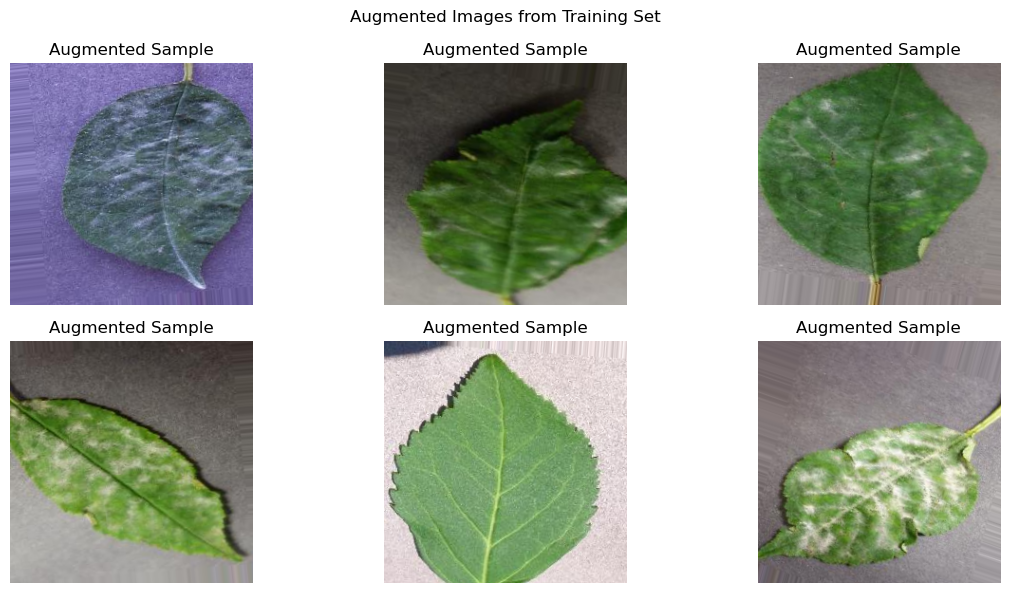

In [2]:
# Visualize augmented images from the training set
import matplotlib.pyplot as plt

augmented_images, _ = next(train_data)

plt.figure(figsize=(12, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
    plt.title("Augmented Sample")
plt.suptitle("Augmented Images from Training Set")
plt.tight_layout()
plt.show()